In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [48]:
df = pd.read_csv("teaching_dataset.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     500 non-null    object 
 1   Advertising_Spend        500 non-null    float64
 2   Social_Media_Engagement  500 non-null    float64
 3   Economic_Index           500 non-null    float64
 4   Promotion_Events         500 non-null    int64  
 5   Customer_Satisfaction    500 non-null    float64
 6   Sales_Revenue            500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


,Advertising_Spend,Social_Media_Engagement,Economic_Index,Promotion_Events,Customer_Satisfaction,Sales_Revenue
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,25500.000000,274.352771,100.038099,0.312000,95.997841,205668.144575
std,14187.594801,134.409784,12.913950,0.463774,7.359482,53458.194220
min,1000.000000,52.277713,72.235931,0.000000,55.500426,84409.112942
25%,13250.000000,158.575861,89.479891,0.000000,94.993835,164113.113766
50%,25500.000000,280.923687,99.469966,0.000000,100.000000,208041.752750
75%,37750.000000,390.256197,110.544900,1.000000,100.000000,244073.514282
max,50000.000000,496.834158,132.233861,1.000000,100.000000,331295.687685


In [17]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.drop(columns=['Date'])


,Advertising_Spend,Social_Media_Engagement,Economic_Index,Promotion_Events,Customer_Satisfaction,Sales_Revenue
0,1000.000000,218.543053,81.708780,0,87.791131,122829.519754
1,1098.196393,477.821438,89.461015,0,100.000000,160286.800273
2,1196.392786,379.397274,84.912440,0,100.000000,150719.561175
3,1294.589178,319.396318,77.355963,0,100.000000,139588.919119
4,1392.785571,120.208388,75.828568,0,92.845236,105546.611896
...,...,...,...,...,...,...
495,49607.214429,209.008503,117.025015,0,90.042599,267515.212235
496,49705.410822,312.645250,117.312322,0,100.000000,310045.718562
497,49803.607214,84.980587,125.060484,0,77.010118,256259.440545
498,49901.803607,488.477663,123.329297,0,100.000000,328776.409383


In [21]:
df1 =df.iloc[:,1:]
df1.head()

,Advertising_Spend,Social_Media_Engagement,Economic_Index,Promotion_Events,Customer_Satisfaction,Sales_Revenue
0,1000.000000,218.543053,81.708780,0,87.791131,122829.519754
1,1098.196393,477.821438,89.461015,0,100.000000,160286.800273
2,1196.392786,379.397274,84.912440,0,100.000000,150719.561175
3,1294.589178,319.396318,77.355963,0,100.000000,139588.919119
4,1392.785571,120.208388,75.828568,0,92.845236,105546.611896


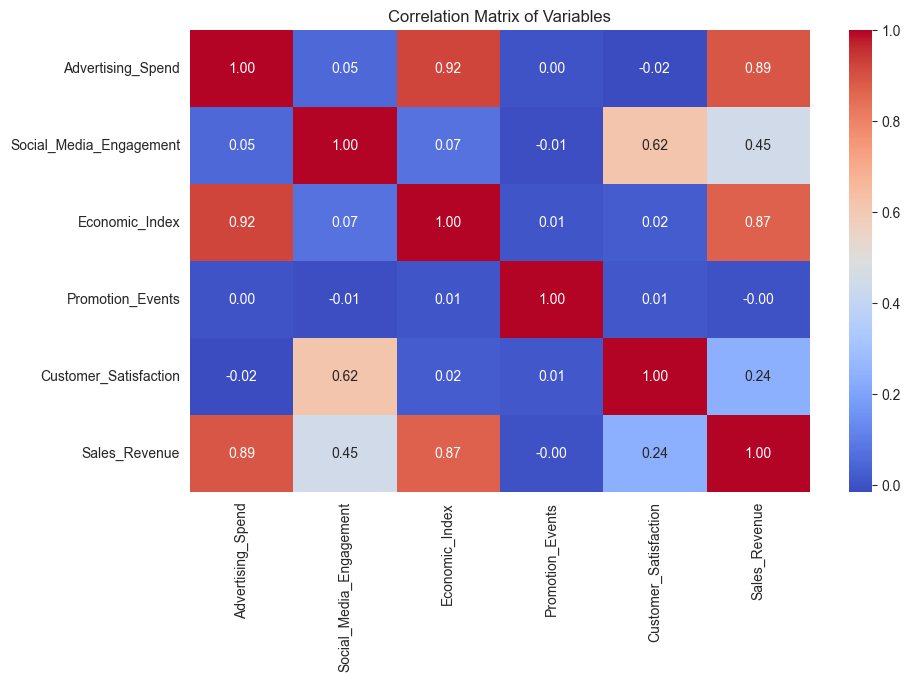

In [22]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()

In [29]:
x=df1.iloc[:,1:5]
x.head()

,Social_Media_Engagement,Economic_Index,Promotion_Events,Customer_Satisfaction
0,218.543053,81.708780,0,87.791131
1,477.821438,89.461015,0,100.000000
2,379.397274,84.912440,0,100.000000
3,319.396318,77.355963,0,100.000000
4,120.208388,75.828568,0,92.845236


In [28]:
y=df1.iloc[:,5:]
y.head()

,Sales_Revenue
0,122829.519754
1,160286.800273
2,150719.561175
3,139588.919119
4,105546.611896


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = dict(zip(x.columns, model.coef_))

print("Mean Absolute Error:", mae)
print("R-Squared:", r2)

Mean Absolute Error: 11848.40540525751
R-Squared: 0.9250394052894239
